# Simple Linear Regression


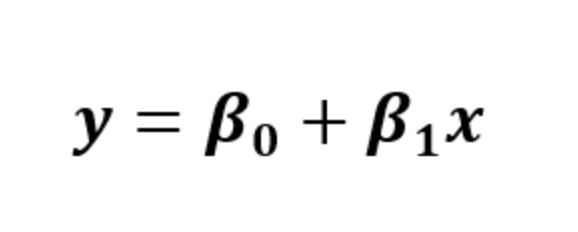

There are 4 assumptions associated with a linear regression model:

1. Linearity: The relationship between independent variables and the mean of the dependent variable is linear.

2. Homoscedasticity: The variance of residuals should be equal.

3. Independence: Observations are independent of each other.

4. Normality: For any fixed value of an independent variable, the dependent variable is normally distributed.

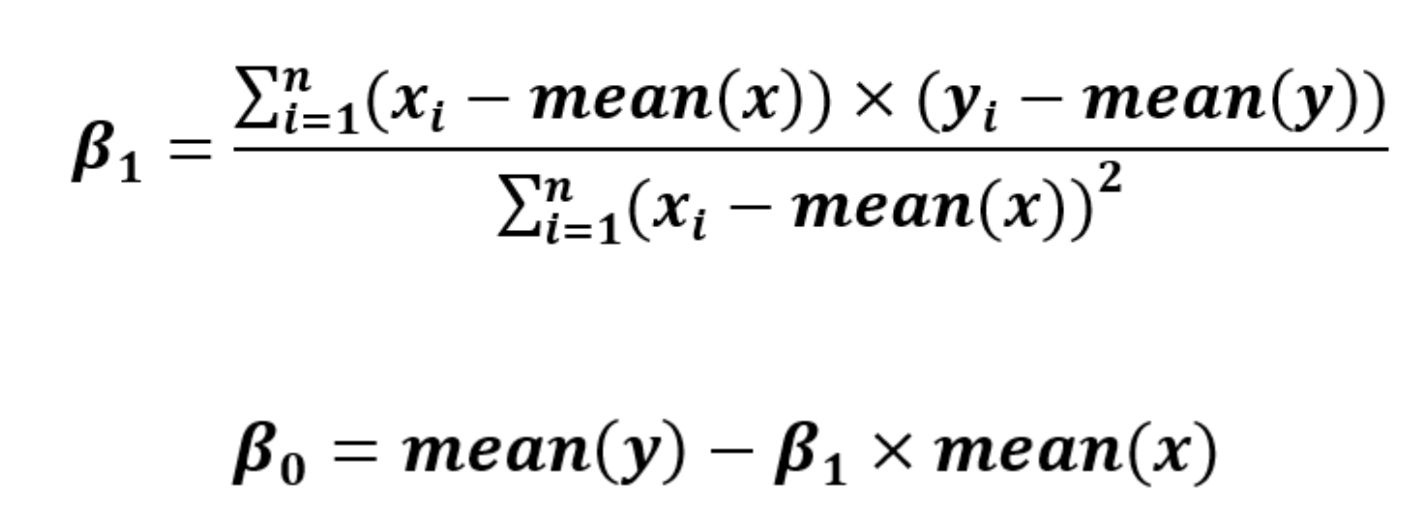

B0 - intercept, B1 - slope

Q1: Мы предполагаем, что существует взаимосвязь между количеством часов, потраченных студентом на обучение, и результатами теста. Чем больше студент занимается, тем лучше результат теста будет. Посмотрим, так ли это.

In [57]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [58]:
students = {'hours': [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50],
            'test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}

student_data = pd.DataFrame(data=students)

In [59]:
#Выведите данные


In [60]:
x = student_data.hours #Independent variable (X) - hours
y = student_data.test_results #Dependent variable (Y) - test results

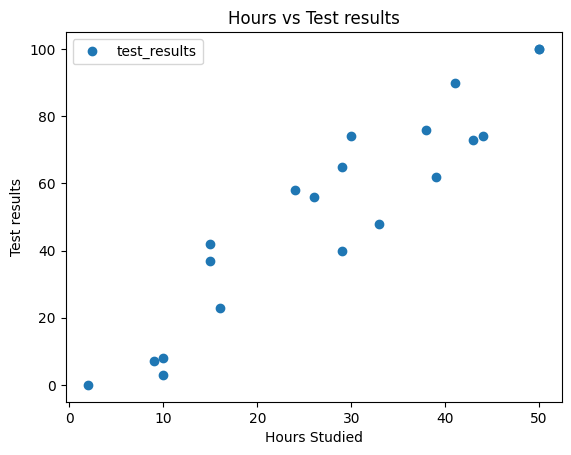

In [61]:
student_data.plot(x='hours', y='test_results', style='o')
plt.title('Hours vs Test results')
plt.xlabel('Hours Studied')
plt.ylabel('Test results')
plt.show()

По графику видно, что существуют линейная зависимость, теперь надо проверить это. Сначала находим по формулам slope и intercept

In [62]:
slope = np.sum((x - np.mean(x))*(y - np.mean(y)))/(np.sum((x-np.mean(x)) ** 2))
slope

2.0146748714407274

In [63]:
intercept = np.mean(y) - slope*np.mean(x)
intercept

-3.9057601953361143

Создаем функцию для Simple Regression model

In [64]:
def simplelinearmodel(x):
    return intercept+slope*x
y_predicted = simplelinearmodel(x)

In [65]:
y_predicted #Значения результатов тестов, которые предсказала наша модель для каждого значения X.

0     54.519811
1     14.226314
2     16.240989
3     72.651885
4     28.329038
5     48.475786
6     96.827983
7     16.240989
8     56.534486
9     62.578511
10    82.725259
11     0.123590
12    74.666560
13    26.314363
14    84.739934
15    54.519811
16    78.695910
17    26.314363
18    44.446437
19    96.827983
Name: hours, dtype: float64

In [66]:
data = {'hours': x, 'predicted_test_results': y_predicted,
        'real_test_results': [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100]}
student_data = pd.DataFrame(data=data)
student_data

,hours,predicted_test_results,real_test_results
0,29,54.519811,65
1,9,14.226314,7
2,10,16.240989,8
3,38,72.651885,76
4,16,28.329038,23
5,26,48.475786,56
6,50,96.827983,100
7,10,16.240989,3
8,30,56.534486,74
9,33,62.578511,48


Используем теперь библиотеки:

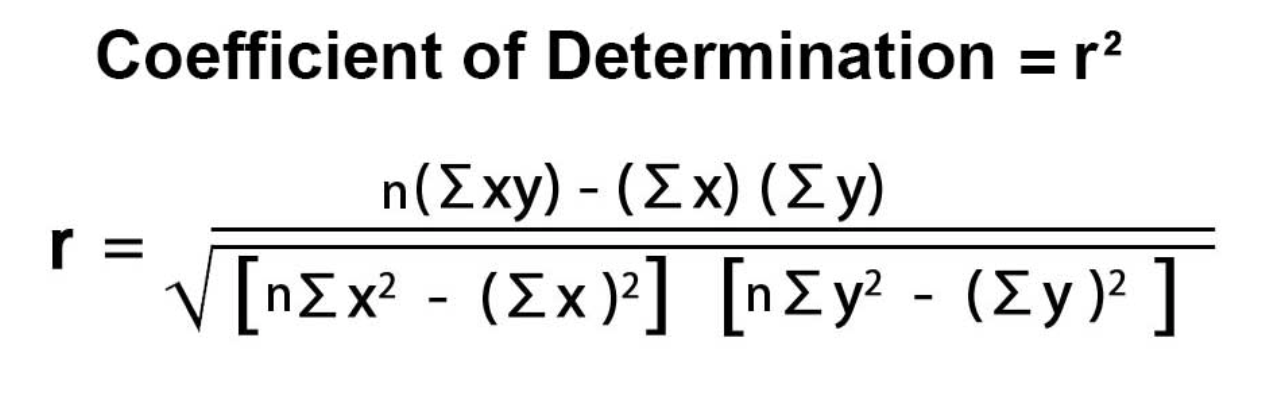

Q2: Мы предполагаем, что есть линейная взаимосвязь между ценой дома и жилой площадью. Чем больше площадь, тем дороже дом. У нас есть датасет с данными, нужно его загрузить и проанализировать.

In [67]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv('kc_house_data.csv')

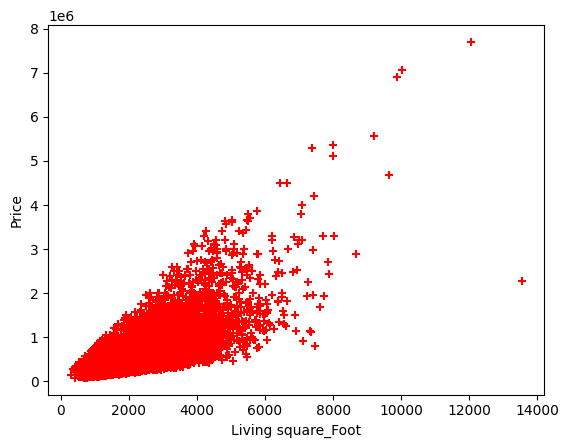

In [69]:
plt.xlabel('Living square_Foot')
plt.ylabel('Price')
plt.scatter(df.sqft_living,df.price,color='red',marker='+')

In [70]:
x = df.price
y = df.sqft_living
price = df.price
sqft_living = df.sqft_living
slope = np.sum((x - np.mean(x))*(y - np.mean(y)))/(np.sum((x-np.mean(x)) ** 2))
slope

0.0017551767966986571

In [71]:
intercept = np.mean(y) - slope*np.mean(x)
intercept

1131.7845451652147

In [72]:
def simplelinearmodel(x):
    return intercept+slope*x
y_predicted = simplelinearmodel(x)
y_predicted

0        1521.258276
1        2076.069662
2        1447.716369
3        2191.911330
4        2026.924711
            ...     
21608    1763.648192
21609    1833.855264
21610    1837.542890
21611    1833.855264
21612    1702.217004
Name: price, Length: 21613, dtype: float64

In [73]:
regression_model = linear_model.LinearRegression()
regression_model.fit(x y)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1963370741.py, line 2)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

# Price = intercept + slope * Area

Мы присмотрели дом, у которого жилая площадь равно 3000 футов. Используя нашу линейную модель регрессии, мы можем предсказать цену этого дома.

Подставив в уравнение вручную: Price = (-45380.7430944728) + 280.6235679 * Area

In [ ]:
price = (-43867.60153385578) + 280.80668993*3000

798552.4682561442

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients: \n', regression_model.coef_)
print()
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(price, price_predicted))

NameError: name 'regression_model' is not defined

Можем построить прямую на графике:

In [ ]:
plt.xlabel('Area', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.scatter(df.sqft_living,df.price,color='red',marker='+')
plt.plot(df.sqft_living,regression_model.predict(df[['sqft_living']]),color='blue')

Используем другую библиотеку:

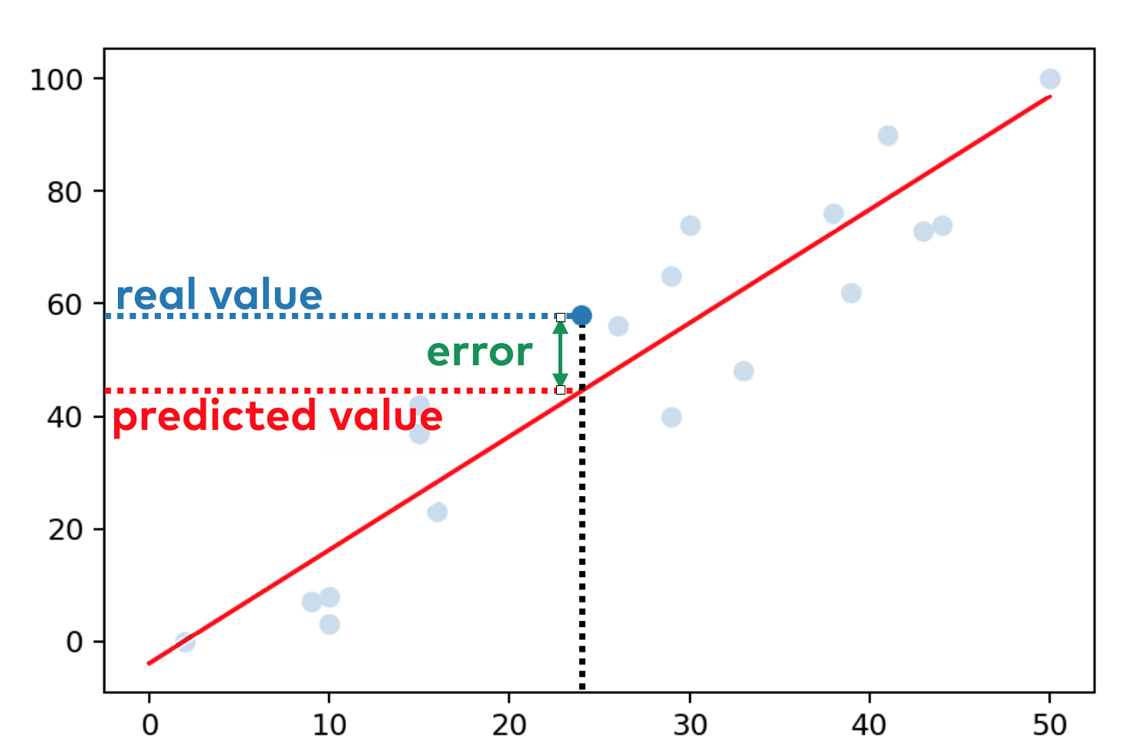

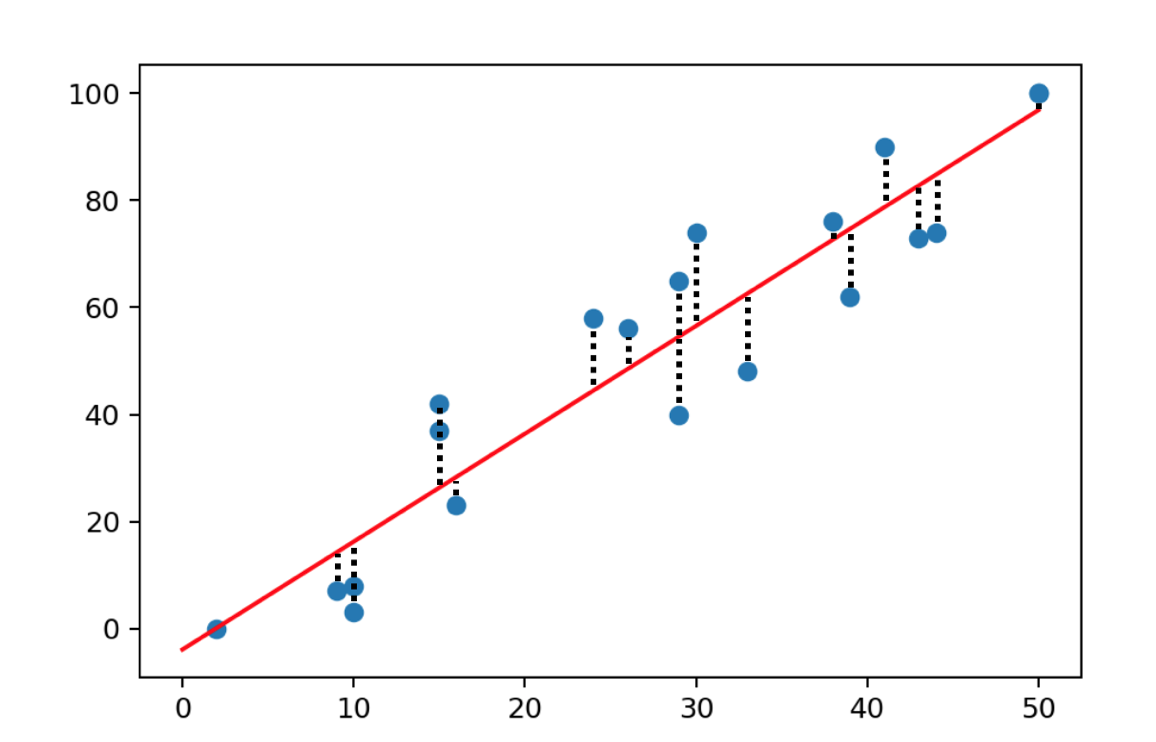

# Multiple linear regression model

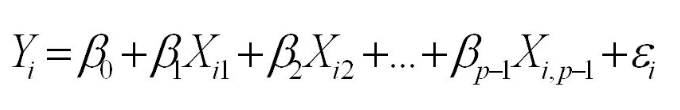

In [ ]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df2 = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

In [ ]:
plt.scatter(df2['Interest_Rate'], df2['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df2['Unemployment_Rate'], df2['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
X = df2[['Interest_Rate','Unemployment_Rate']]
Y = df2['Stock_Index_Price']

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# Logistic regression

Logistic Regression is a classification algorithm which is used when we want to predict a categorical variable (Yes/No, Pass/Fail) based on a set of independent variable(s).

Assumptions: 

1. The dependent variable must be categorical
2. The independent variables(features) must be independent (to avoid multicollinearity).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Используем датасет с данными о пассажирах с Титаника. Для начала надо его загрузить: